# Exercise 5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

import sklearn.metrics


# import PolynomialFeatures and make_pipeline for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

%matplotlib inline

/Users/Nils/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Exercise 5.1

In [2]:
# read in data

columns =['Party', 'x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16']

df = pd.read_csv('house-votes-84_data.csv', names=columns)

In [3]:
# change y and n

def change(x):
    if x == 'n':
        x=0
    elif x == 'y':
        x=1
    return x

In [4]:
for i in xrange(16):
    df.iloc[:,i+1]=df.iloc[:,i+1].map(change)

In [5]:
# get means for each column
means=[]
for i in xrange(16):
    means.append((df[df['x%s' %(i+1)]!='?'].iloc[:,i+1].mean()))

In [6]:
# replace ? by 0/1 with p = mean
def replace_no(x):
    if x == '?':
        x = np.random.binomial(1,means[i])
    return x

In [7]:
for i in xrange(16):
    df.iloc[:,i+1]=df.iloc[:,i+1].map(replace_no)

## Exercise 5.2 Train/Test Split

In [8]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)

## Exercise 5.3  KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [11]:
accuracy_scores=[]

for n in xrange(1,21):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    accuracy_scores.append(accuracy_score(y_test,knn.predict(X_test)))

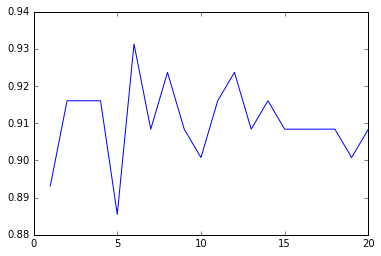

In [12]:
plt.plot(range(1,21),accuracy_scores)

## Exercise 5.4 Logistig Regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logReg = LogisticRegression()

In [15]:
logReg.fit(X_train, y_train)
logReg_score=accuracy_score(y_test,logReg.predict(X_test))

In [16]:
logReg_list=[]
for i in xrange(1,21):
    logReg_list.append(logReg_score)

## Exercise 5.5 Bar Graph and dummy predictors

In [17]:
list = []
for i in xrange(2):
    list.append(df['Party'].value_counts()[i])
list

[267, 168]

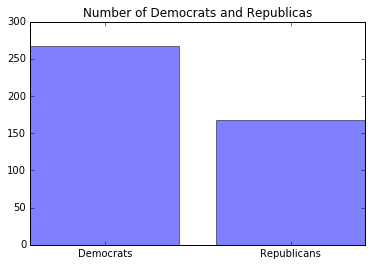

In [18]:
parties=['Democrats','Republicans']
y_pos=np.arange(len(parties))
plt.bar(y_pos, list, align='center', alpha=0.5)
plt.xticks(y_pos,parties)
plt.title('Number of Democrats and Republicas')

In [19]:
# make function that always returns a democrat

def demo(X):
    list_result=[]
    for i in xrange(X.count()[0]):
        list_result.append('democrat')
    return list_result

In [20]:
y_pred=demo(df.iloc[:,1:])
demoscore=accuracy_score(y,y_pred)
listdemo = []

for i in xrange(1,21):
    listdemo.append(demoscore)

In [21]:
def repu(X):
    list_result=[]
    for i in xrange(X.count()[0]):
        list_result.append('republican')
    return list_result

In [22]:
y_pred2=repu(df.iloc[:,1:])
repuscore=accuracy_score(y,y_pred2)

listrepu=[]

for i in xrange(1,21):
    listrepu.append(repuscore)

## Exercise 5.6 Plot accuracies across models

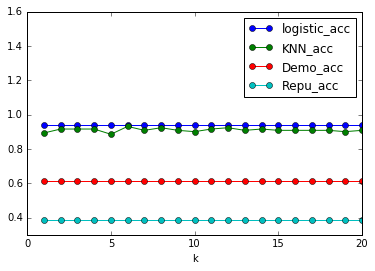

In [23]:
plt.plot(range(1,21),logReg_list,'-o', linewidth = 1)
plt.plot(range(1,21),accuracy_scores,'-o', linewidth = 1)
plt.plot(range(1,21),listdemo,'-o',linewidth = 1)
plt.plot(range(1,21),listrepu,'-o',linewidth = 1)
plt.xlabel('m')
plt.legend(['logistic_acc','KNN_acc','Demo_acc','Repu_acc'])
plt.ylim([0.3,1.6]);

## Exercise 5.7

In [24]:
from sklearn.learning_curve import learning_curve

/Users/Nils/anaconda/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [25]:
lc = learning_curve(logReg,X,y)
ms = lc[0]
train_err=lc[1]
test_err=lc[2]

In [26]:
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(test_err, axis=1)

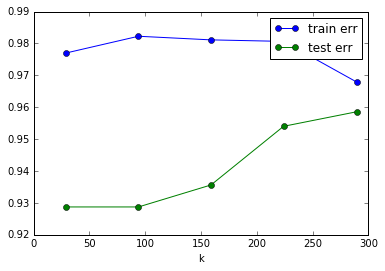

In [27]:
plt.plot(ms,train_cv_err,'-o', linewidth = 1)
plt.plot(ms,test_cv_err,'-o', linewidth = 1)
plt.xlabel('k')
plt.legend(['train err', 'test err'])

## Exercise 5.8 Further Classification algorithms

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
GNB=GaussianNB()
GNB.fit(X_train,y_train)
accuracy_score(y_test,GNB.predict(X_test))

0.91603053435114501

In [30]:
sv=SVC()
sv.fit(X_train,y_train)
accuracy_score(y_test,sv.predict(X_test))

0.90839694656488545

In [31]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
accuracy_score(y_test,DTC.predict(X_test))

0.93129770992366412

In [32]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
accuracy_score(y_test,RFC.predict(X_test))

0.93129770992366412

## Exercise 5.9 Cross Validation

In [33]:
from sklearn.cross_validation import cross_val_score

In [34]:
cross_val_score(GNB,X,y).mean()

0.92873563218390798

In [35]:
cross_val_score(sv,X,y).mean()

0.9517241379310345

In [36]:
cross_val_score(DTC,X,y).mean()

0.93103448275862066

In [37]:
cross_val_score(RFC,X,y).mean()

0.95632183908045976

## Exercise 5.10 predict vote

In [119]:
df2=pd.read_csv('house-votes-84_data.csv', names=columns)

In [120]:
df2.replace('y',1, inplace=True)
df2.replace('n',0, inplace=True)

In [121]:
df2.replace('?',np.nan,inplace=True)

In [122]:
from scipy import stats

In [123]:
for i in xrange(1,17):
    mode = stats.mode(np.array(df2['x%s' %(i)]))
    df2['x%s' %(i)].replace(np.nan,mode.mode[0], inplace=True)

In [124]:
y2=df2.iloc[:,1]
X2=df2.iloc[:,2:]

In [126]:
LR = LogisticRegression()
LR.fit(X2,y2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [127]:
cross_val_score(LR,X2,y2).mean()

0.67561451389982319

## Exercise 5.11

In [128]:
movie_df=pd.read_csv('2013_movies.csv')

In [150]:
movie_df['Rtimecat']=movie_df['Runtime'].map(lambda x: x >100)
movie_df.dropna(how='any', inplace=True)

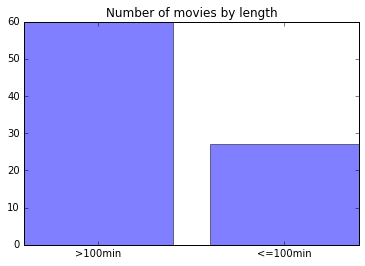

In [155]:
list2 = [60,87-60]

Rtime=['>100min','<=100min']
y_pos2=np.arange(len(Rtime))
plt.bar(y_pos2, list2, align='center', alpha=0.5)
plt.xticks(y_pos,Rtime)
plt.title('Number of movies by length')

In [156]:
X3=movie_df[['Budget','DomesticTotalGross']]
y3 = movie_df['Rtimecat']

In [157]:
knn2 = KNeighborsClassifier(n_neighbors=5)
LR2 = LogisticRegression()

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X3,y3,test_size=0.3)

In [162]:
knn2.fit(X_train, y_train)
LR2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [163]:
accuracy_score(y_test,knn2.predict(X_test))

0.62962962962962965

In [176]:
accuracy_score(y_test,LR2.predict(X_test))

0.85185185185185186

In [186]:
# stupid regressor

def stup_reg(x):
    return 1

In [187]:
stup_pred=X_test.iloc[:,0].map(stup_reg)

In [188]:
accuracy_score(y_test,stup_pred)

0.85185185185185186

In [189]:
LR2.coef_

array([[  4.14321489e-09,   1.67704645e-09]])

## Exercise 5.12 Cancer Data

In [192]:
cancer_df=pd.read_csv('haberman.data.txt', names = ['Age','year','nodes','Surv'])

In [197]:
cancer_df.describe()

,Age,year,nodes,Surv
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [194]:
cancer_df.groupby('Surv').mean()

,Age,year,nodes
Surv,,,
1,52.017778,62.862222,2.791111
2,53.679012,62.827160,7.456790


In [195]:
cancer_df.groupby('Surv').std()

,Age,year,nodes
Surv,,,
1,11.012154,3.222915,5.870318
2,10.167137,3.342118,9.185654


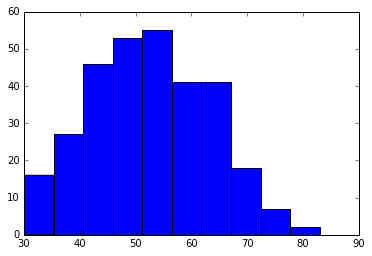

In [199]:
plt.hist(cancer_df['Age']);

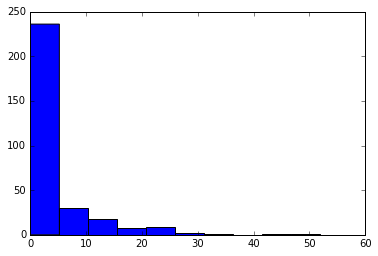

In [200]:
plt.hist(cancer_df['nodes']);

In [205]:
cancer_df.sort_values('year', ascending=True).iloc[0,1]

58

In [206]:
cancer_df.sort_values('year', ascending=False).iloc[0,1]

69

In [209]:
LR3=LogisticRegression()
y=cancer_df.iloc[:,-1]
X = cancer_df.iloc[:,0:-1]

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
LR3.fit(X_train, y_train)
accuracy_score(y_test,LR3.predict(X_test))

0.72826086956521741

In [215]:
lc2 = learning_curve(logReg,X,y)
ms2 = lc[0]
train_err2=lc[1]
test_err2=lc[2]

In [217]:
train_cv_err2 = np.mean(train_err, axis=1)
test_cv_err2 = np.mean(test_err, axis=1)

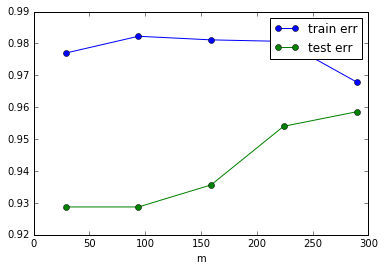

In [218]:
plt.plot(ms,train_cv_err2,'-o', linewidth = 1)
plt.plot(ms,test_cv_err2,'-o', linewidth = 1)
plt.xlabel('m')
plt.legend(['train err', 'test err'])